Figure 5E
(E) DHX15R222G does not rescue cryptic splicing induced by DHX15 degradation. (E) Sashimi plot of reads mapping to the SNAPC1 intron and flanking exons. Data are representative of biological triplicates for each condition.  

In [ ]:
%%capture

!~/pysashimi/main.py plot \
-b ../../data/pysashimi_tables/pysashimi_bam_list_dhx15_mut.txt \
-e chr14:61767253-61768735:- \
-t 3 \
--color-factor 3 \


Figure 5F
(F) DHX15R222G does not rescue cryptic splicing induced by DHX15 degradation. (F) Cryptic splice junctions were quantified in LM2 FKBP-DHX15 cells expressing GFP, DHX15WT, and DHX15R222G upon degradation of the FKBP-DHX15 allele. Expression of DHX15WT suppresses accumulation of cryptic splice junctions while GFP and DHX15R222G do not. Bar plot depicts fold change in cryptic splicing magnitude compared to DMSO treatment after 6hrs of target degradation (mean +/- SEM, n=3 biological replicates/condition, two-tailed unpaired Student’s t-test).

In [1]:
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.patches import Patch
from natsort import os_sorted
from scipy.stats import sem


In [2]:
filelist = os_sorted(glob.glob('../../data/r222g_mutant/sj_out/*'))

In [3]:
def get_uj_counts(filenam):
    test = pd.read_csv(filenam, sep='\t')
    test_filt = test[test['unique'] >= 3]
    intronic = np.sum([i == 'intronic' for i in test_filt['class']])
    match_5 = np.sum([i == 'matching 5' for i in test_filt['class']])
    match_3 = np.sum([i == 'matching 3' for i in test_filt['class']])
    ki = np.sum([i == 'known intron' for i in test_filt['class']])
    
    return [ki, match_5, match_3, intronic]

def flatten(regular_list):
    return [item for sublist in regular_list for item in sublist]


In [4]:
uj_counts = [get_uj_counts(i) for i in filelist]


/storage/cylin/home/bmho/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
uj_df = pd.DataFrame(uj_counts)
uj_df.columns = ['known intron', 'matching 5', 'matching 3', 'intronic']

uj_df.index = [i.split('/')[-1].split('_SJ')[0] for i in filelist]


In [6]:
metadata = pd.read_csv(
    '../../data/r222g_mutant/r222g_mutant_metadata.txt',
    sep='\t',
    dtype='object',
    index_col=1
)
metadata['code'] = metadata['Clone'] + '_' + metadata['Dosage value'] + '_' + metadata['Time value']

In [7]:
code_list = [
    'WT_Veh_24',
    'GFP_Trt_6',
    'WT_Trt_6',
    'R222G_Trt_6',
]

In [8]:
uj_ki_norm = uj_df.divide(uj_df.loc[:,'known intron'],axis=0)


In [9]:
bar_vals = []
error_vals = []
for i in code_list:
    inds = metadata[metadata['code'] == i].index 
    bar_vals.append(np.mean(uj_ki_norm.loc[inds,:]))
    error_vals.append(sem(uj_ki_norm.loc[inds,:]))
    
bar_vals = pd.DataFrame(bar_vals)
error_vals = pd.DataFrame(error_vals)

bar_vals.index = code_list
error_vals.index = code_list
error_vals.columns = uj_df.columns

In [10]:
def make_uj_plot_no_ki_ax(ax,colnam,bars,errors,colors):
    xvals = range(len(bars))

    yvals = bars.loc[:,colnam].transpose().values
    errs = errors.loc[:,colnam].transpose().values
    
    ax.bar(
        xvals,
        yvals,
        yerr=errs,
        color=colors,
    )
    

    ax.set_xticks([])

    ax.set_ylabel(colnam + ' UJ/KI', fontsize=12)


In [11]:
legend_elements = [
        Patch(
            facecolor='tab:grey',
            label=code_list[0]
        ),
        Patch(
            facecolor='tab:red',
            label=code_list[1]
        ),
        Patch(
            facecolor='tab:blue',
            label=code_list[2] 
        ),
        Patch(
            facecolor='tab:orange',
            label=code_list[3] 
        ),
    ]

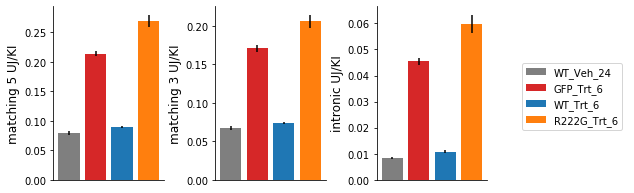

In [12]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(9,3))

plt.tight_layout(w_pad=2)

color_list = ['tab:grey','tab:red','tab:blue','tab:orange']

make_uj_plot_no_ki_ax(
    ax1,
    'matching 5',
    bar_vals,
    error_vals,
    color_list
)
make_uj_plot_no_ki_ax(
    ax2,
    'matching 3',
    bar_vals,
    error_vals,
    color_list
)
make_uj_plot_no_ki_ax(
    ax3,
    'intronic',
    bar_vals,
    error_vals,
    color_list
)

box = ax4.get_position()
ax4.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax4.axis('off')
ax4.legend(handles = legend_elements,bbox_to_anchor=(1, 0.7))


for ax in [ax1,ax2,ax3]:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    

Figure 5J
(J) Dhx15R222G mutation in AML1-ETO9a cell lines induces cryptic splicing. Sashimi plot of representative intron mis-spliced in both heterozygous and homozygous Dhx15R222G cell lines.

In [ ]:
%%capture

!~/pysashimi/main.py plot \
-b ../../data/pysashimi_tables/pysashimi_bam_list_aml_mouse.txt \
-e chr9:44299279-44299605:+ \
-t 3 \
--color-factor 3 \


Figure 5K
(K) Introduction of Dhx15R222G mutation increases cryptic splicing. Number of unique cryptic splice junctions was quantified in introns mis-spliced in heterozygous and homozygous Dhx15R222G mutation in AML1-ETO9a cell lines. Bar plot depicts the fold change in number of cryptic splice junctions in tamoxifen vs vehicle treated cells (mean +/- SEM, n=3 biological replicates/condition, two-tailed unpaired Student’s t-test).

In [3]:
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from natsort import os_sorted
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

from scipy.stats import sem


In [4]:
metadata = pd.read_csv(
    '../../data/aml_mouse/aml_mouse_metadata.txt',
    sep='\t',
    dtype='object'
)
metadata['code'] = metadata['Dosage value'] + '_' + metadata['Dosage 2 value'] + '_' + metadata['Time value']

In [5]:
filelist = os_sorted(
    glob.glob(
        '../../data/aml_mouse/intron_misproc/*tsv'
    )
)

proc_counts = [pd.read_csv(i,sep='\t',index_col='gene_id').processed for i in filelist]
unproc_counts = [pd.read_csv(i,sep='\t',index_col='gene_id').unprocessed for i in filelist]

proc_df = pd.DataFrame(proc_counts).transpose()
proc_df.columns = [i.split('/')[-1].split('_Aligned')[0] for i in filelist]

unproc_df = pd.DataFrame(unproc_counts).transpose()
unproc_df.columns = [i.split('/')[-1].split('_Aligned')[0] for i in filelist]

/storage/cylin/home/bmho/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [6]:
# greater than 200 in 90% of samples sample

exp_genes = np.sum(proc_df>200,axis=1)>(0.9*len(filelist))
proc_df_filt = proc_df.loc[exp_genes]
unproc_df_filt = unproc_df.loc[exp_genes]

pca_df = (unproc_df_filt/(proc_df_filt + unproc_df_filt))

In [7]:
color_dict = {
    'WT_24':'silver',
    'Het_24':'cornflowerblue',
    'Homo_24':'lightcoral',
    'WT_48':'dimgray',
    'Het_48':'royalblue',
    'Homo_48':'firebrick'
}

symbol_dict = {
    'Veh':'.',
    'Tam':'*'
}

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x = StandardScaler().fit_transform(np.sqrt(pca_df.transpose()))

pca = PCA(n_components=10)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(
    data = principalComponents, 
    columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10']
)

colors = [color_dict[i+'_'+j] for i,j in zip(metadata['Dosage value'],metadata['Time value'])]
symbol = [symbol_dict[i] for i in metadata['Dosage 2 value']]
targets = metadata['code'].values


finalDf = pd.concat(
    [
        principalDf, 
        pd.Series(colors), 
        pd.Series(symbol),
        pd.Series(targets),
    ], axis = 1)

pca_var_dict = {
    principalDf.columns[i]:pca.explained_variance_ratio_[i] 
    for i in range(len(principalDf.columns))}    

In [9]:
legend_elements = [
    Patch(
        facecolor='dimgray',
        label='WT'
    ),
    Patch(
        facecolor='royalblue',
        label='Het' 
    ),
    Patch(
        facecolor='firebrick',
        label='Homo' 
    ),
    Line2D(
        [0], [0], 
        marker='.', 
        color='w', 
        label='Veh',
        markerfacecolor='k',
        markersize=15),
    Line2D(
        [0], [0], 
        marker='*', 
        color='w', 
        label='Tam',
        markerfacecolor='k',
        markersize=15),
    Patch(
        facecolor='gainsboro',
        label='24 hr' 
    ),
    Patch(
        facecolor='k',
        label='48 hr' 
    ),
]

Text(0.5, 1.0, 'Misproc ratios')

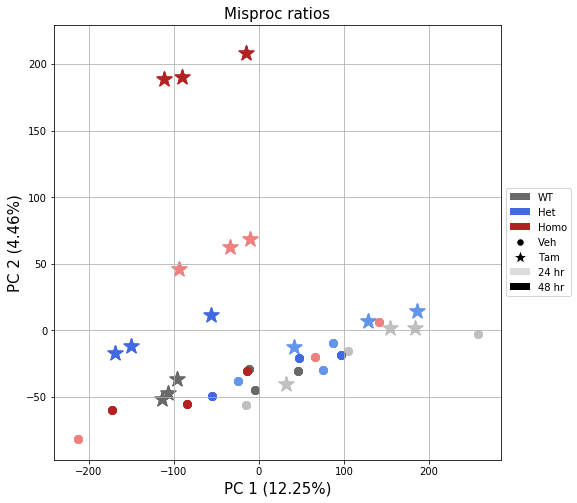

In [10]:
pc_x = 'PC 1'
pc_y = 'PC 2'

xlab = pc_x + ' ('+ "{:.2f}".format(pca_var_dict[pc_x]*100) + '%)'
ylab = pc_y + ' ('+ "{:.2f}".format(pca_var_dict[pc_y]*100) + '%)'

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(xlab, fontsize = 15)
ax.set_ylabel(ylab, fontsize = 15)

for target in targets:
    indicesToKeep = finalDf.iloc[:,-1] == target
    color = finalDf.loc[indicesToKeep,0].values[0]
    symbol = finalDf.loc[indicesToKeep,1].values[0]
    ax.scatter(finalDf.loc[indicesToKeep, pc_x],
               finalDf.loc[indicesToKeep, pc_y],
               c = color,
               s = 250,
               marker=symbol,
              )



box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.grid()

plt.legend(handles = legend_elements,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Misproc ratios', fontsize=15)



In [11]:
inds_pc2 = abs(pd.DataFrame(pca.components_)).idxmax()==1


In [12]:
het_24_introns = pd.read_csv(
    '../../data/aml_mouse/diff_misproc_tabs/Het_Tam_vs_Veh_24hr.csv',
    sep='\t',
    index_col=0
)

het_48_introns = pd.read_csv(
    '../../data/aml_mouse/diff_misproc_tabs/Het_Tam_vs_Veh_48hr.csv',
    sep='\t',
    index_col=0
)

homo_48_introns = pd.read_csv(
    '../../data/aml_mouse/diff_misproc_tabs/Homo_Tam_vs_Veh_48hr.csv',
    sep='\t',
    index_col=0
)

In [15]:
het_24_filt = het_24_introns.loc[pca_df.index[inds_pc2]]

sig_het_24 = het_24_filt[
    (het_24_filt['binomial_test_adj_p'] < 1e-5) &
    (het_24_filt['delta_ratio']>0)
].index

het_48_filt = het_48_introns.loc[pca_df.index[inds_pc2]]

sig_het_48 = het_48_filt[
    (het_48_filt['binomial_test_adj_p'] < 1e-5) &
    (het_48_filt['delta_ratio']>0)
].index

homo_48_filt = homo_48_introns.loc[pca_df.index[inds_pc2]]

sig_homo_48 = homo_48_filt[
    (homo_48_filt['binomial_test_adj_p'] < 1e-5) &
    (homo_48_filt['delta_ratio']>0)
].index


In [16]:
sig_all = list(set(sig_het_24).union(sig_het_48))

homo_48_filt = homo_48_introns.loc[sig_all]

sig_filt = homo_48_filt.loc[
    homo_48_filt['delta_ratio']>0
].index

In [17]:
labeled_x = pd.DataFrame(
    StandardScaler().fit_transform(np.sqrt(pca_df.transpose().iloc[18:,:]))
).transpose()
labeled_x.index = pca_df.index
labeled_x.index.name = 'intron_id'
labeled_x.columns = metadata['Sample display name'].values[18:]

heatmap_tsv = labeled_x.loc[sig_filt]

In [18]:
def flatten(regular_list):
    return [item for sublist in regular_list for item in sublist]

def get_sj(meta_df):
    filedir = '../../data/aml_mouse/sj_out/'
    tmp = []
    for i,row in meta_df.iterrows():
        tmp.append(glob.glob(filedir+row['Sample display name']+'*')[0])
    return tmp

def get_uj_introns(filenam):
    uj_df = pd.read_csv(filenam,sep='\t')
    uj_df_filt = uj_df.loc[
        (uj_df['unique'] >= 3) &
        (
            (uj_df['class'] == 'matching 3') |
            (uj_df['class'] == 'matching 5') |
            (uj_df['class'] == 'intronic')
        )
    ]

    intron_list = uj_df_filt['intron_ids'].dropna().values
    intron_list = [i.replace(' ','') for i in intron_list]
    return intron_list

In [19]:
metadata['filepath'] = get_sj(metadata)

In [20]:
uj_introns = [get_uj_introns(i) for i in metadata['filepath']]


/storage/cylin/home/bmho/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:
uj_df = pd.DataFrame([np.sum([i in heatmap_tsv.index for i in j]) for j in uj_introns])

In [22]:
code_list = [
    'WT_Veh_48',
    'WT_Tam_48',
    'Het_Veh_48',
    'Het_Tam_48',
    'Homo_Veh_48',
    'Homo_Tam_48'
]

In [23]:
bar_vals = []
error_vals = []
for i in code_list:
    inds = metadata[metadata['code'] == i].index
    ctrl_code = i.split('_')[0] + '_Veh_' + i.split('_')[-1]
    ctrl_inds = metadata[metadata['code'] == ctrl_code].index
    
    norm_df = uj_df.loc[inds,:]/np.mean(uj_df.loc[ctrl_inds,:])
    bar_vals.append(np.mean(norm_df))
    error_vals.append(sem(norm_df))
    
bar_vals = pd.DataFrame(bar_vals)
error_vals = pd.DataFrame(error_vals)

bar_vals.index = code_list
error_vals.index = code_list
error_vals.columns = uj_df.columns

In [24]:
color_list = ['tab:grey','tab:red']*3

bar_legend_elements = [
    Patch(
        facecolor='tab:grey',
        label='Vehicle',
    ),
    Patch(
        facecolor='tab:red',
        label='Tam',
    ),
]
    
    

def make_uj_plot_no_ki_ax(ax,colnam,bars,errors,colors):
    xvals = [
        0,1,
        3,4,
        6,7
    ]

    yvals = bars.loc[:,colnam].transpose().values
    errs = errors.loc[:,colnam].transpose().values
    
    ax.bar(
        xvals[::2],
        yvals[::2],
        yerr=errs[::2],
        color=colors[::2],
    )
    
    ax.bar(
        xvals[1::2],
        yvals[1::2],
        yerr=errs[1::2],
        color=colors[1::2],
    )
    
    ax.set_xticks([])

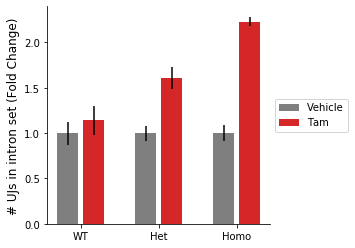

In [25]:
fig,ax1 = plt.subplots(1,1,figsize=(4,4))

make_uj_plot_no_ki_ax(ax1,0,bar_vals,error_vals,color_list)

xlabs = ['WT','Het','Homo',]
xticks = [0.5,3.5,6.5,]
ax1.set_xticks(xticks)
ax1.set_xticklabels(xlabs,ha='center')

ax1.legend(handles = bar_legend_elements,loc='center left', bbox_to_anchor=(1, 0.5))

ax1.set_ylabel('# UJs in intron set (Fold Change)', fontsize=12)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)